### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os

### Importing the dataset

In [3]:
data=pd.read_excel(r"D:\Crudeoil price prediction\Crude Oil Prices Daily.xlsx")
data.head()

,Date,Closing Value
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87


### Handling missing values

In [4]:
data.isnull().any()

Date             False
Closing Value     True
dtype: bool

In [5]:
data.isnull().sum()

Date             0
Closing Value    7
dtype: int64

In [6]:
data.dropna(axis=0,inplace=True)

In [7]:
data=data.reset_index()['Closing Value']

In [8]:
data.head()

0    25.56
1    26.00
2    26.53
3    25.85
4    25.87
Name: Closing Value, dtype: float64

### Feature scaling

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data=scaler.fit_transform(np.array(data).reshape(-1,1))

In [10]:
data

array([[0.11335703],
       [0.11661484],
       [0.12053902],
       ...,
       [0.46497853],
       [0.47038353],
       [0.47149415]])

In [11]:
len(data)

8216

### Data visualization

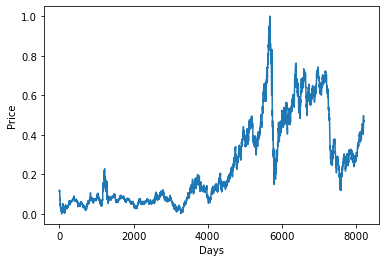

In [12]:
plt.plot(data)
plt.xlabel("Days")
plt.ylabel("Price")
plt.show()

### Testing and training 

In [49]:
training_size=int(len(data)*0.80)
testing_size=len(data)-training_size
train_data,test_data=data[0:training_size],data[training_size:len(data)]

In [50]:
train_data.shape
len(test_data)

1644

### Sliding window

In [51]:
def create_dataset(dataset,timestep):
    dataX,dataY=[],[]
    for i in range(len(dataset)-timestep-1):
        a=dataset[i:(i+timestep),0]
        dataX.append(a)
        dataY.append(dataset[i+timestep,0])
    return np.array(dataX),np.array(dataY)

In [52]:
time_step=10
x_train,y_train=create_dataset(train_data,time_step)
x_test,y_test=create_dataset(test_data,time_step)


In [54]:
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)

In [55]:
print(x_train.shape)
print(y_test.shape)

(6561, 10)
(1633, 1)
